# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import missingno as msno

# Loading loan dataset to pandas

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df =pd.read_csv('loan.csv')

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14868\2027569668.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('loan.csv')


In [4]:
df.shape

(39717, 111)

# Data Exploration and Cleaning

__In this section we are:__

- Cleaning the data based on null values
- Converting the data types of the features as per relevance
- Imputing Null Values
- Outlier detection and treatment

In [5]:
### Checking null values
nulls =df.isnull().sum()
nulls

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
## A lot of columns are completely null, removing such columns

null_cols =list(nulls[nulls == len(df)].index)
not_null_cols =[i for i in df.columns if i not in null_cols]
df =df[not_null_cols]

## Analyzing Categorical Columns

In [7]:
cat_cols =[i for i in df.columns if df[i].dtype =='object']

In [8]:
## Getting the count of unique values for the categorical columns
cat_cols_nunique= {i: df[i].nunique() for i in cat_cols}
cat_cols_nunique

{'term': 2,
 'int_rate': 371,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28820,
 'emp_length': 11,
 'home_ownership': 5,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 3,
 'pymnt_plan': 1,
 'url': 39717,
 'desc': 26527,
 'purpose': 14,
 'title': 19615,
 'zip_code': 823,
 'addr_state': 50,
 'earliest_cr_line': 526,
 'revol_util': 1089,
 'initial_list_status': 1,
 'last_pymnt_d': 101,
 'next_pymnt_d': 2,
 'last_credit_pull_d': 106,
 'application_type': 1}

In [9]:
# Removing columns with only one cardinal value 
df.drop(columns =['pymnt_plan','initial_list_status','application_type'], inplace=True)

# Removing columns with very high cardinality
df.drop(columns =['emp_title','url','title','desc','zip_code','next_pymnt_d'], inplace =True)

In [10]:
# Data Type processing 

# Converting Interest rate and revol_util to float values
df['int_rate'] =df['int_rate'].str.replace("%",'').astype('float')
df['revol_util'] =df['revol_util'].str.replace("%",'').astype('float')

# # Converting object date columns to date
df['issue_d'] =pd.to_datetime(df['issue_d'],format='%b-%y')
df['last_pymnt_d'] =pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

# Converting Term to int
df['term']=df['term'].str.replace(' months', '').astype('int')

In [11]:
# Need to take care while converting earliest credit line to date can add here

## Analyzing Continous Variables

In [12]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,14035.000,2786.000,39717.000,39717.000,39717.000,39667.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39661.000,39717.000,39717.000,39661.000,39717.000,39020.000,39678.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,42.418,12.021,324.562,68968.926,13.315,0.147,0.869,35.901,69.698,9.294,0.055,13382.528,48.832,22.089,51.228,50.990,12153.597,11567.149,9793.349,2263.663,1.363,95.222,12.406,2678.826,0.000,1.000,0.000,0.000,0.000,0.043,0.000
std,210694.133,265678.307,7456.671,7187.239,7128.450,10.623,3.725,208.875,63793.766,6.679,0.492,1.070,22.020,43.823,4.400,0.237,15885.017,28.333,11.402,375.173,373.824,9042.041,8942.673,7065.522,2608.112,7.290,688.745,148.672,4447.136,0.000,0.000,0.000,0.000,0.000,0.204,0.000
min,54734.000,70699.000,500.000,500.000,0.000,36.000,5.420,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,516221.000,666780.000,5500.000,5400.000,5000.000,36.000,9.250,167.020,40404.000,8.170,0.000,0.000,18.000,22.000,6.000,0.000,3703.000,25.400,13.000,0.000,0.000,5576.930,5112.310,4600.000,662.180,0.000,0.000,0.000,218.680,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,665665.000,850812.000,10000.000,9600.000,8975.000,36.000,11.860,280.220,59000.000,13.400,0.000,1.000,34.000,90.000,9.000,0.000,8850.000,49.300,20.000,0.000,0.000,9899.640,9287.150,8000.000,1348.910,0.000,0.000,0.000,546.140,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,60.000,14.590,430.780,82300.000,18.600,0.000,1.000,52.000,104.000,12.000,0.000,17058.000,72.400,29.000,0.000,0.000,16534.433,15798.810,13653.260,2833.400,0.000,0.000,0.000,3293.160,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,60.000,24.590,1305.190,6000000.000,29.990,11.000,8.000,120.000,129.000,44.000,4.000,149588.000,99.900,90.000,6311.470,6307.370,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,0.000,1.000,0.000,0.000,0.000,2.000,0.000


In [13]:
# Removing continous variables that have only 0 values and ids 

df.drop(columns=['id','member_id','policy_code','acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True)


In [14]:
# Removing variables which can be calculated only post loan approval
# Cannot use these variables proactively

df.drop(columns =['recoveries','collection_recovery_fee'], inplace =True)

## Handling missing values and cleaning data

In [15]:
# Current loan status is not required for our analysis
df = df[df.loan_status!='Current']

In [16]:
# filling missing emp_length values with "Unknown"
df.emp_length.fillna('Unknown', inplace=True)
# filling missing revol_util values with median
df.revol_util.fillna(value=df.revol_util.median(), inplace=True)

In [17]:
# Removing variables which has more than 60 percent missing values
df.drop(columns =['mths_since_last_delinq','mths_since_last_record'], inplace =True)

In [18]:
# Removing loan_amnt as it not the actual amount issue to the borrower
df.drop(columns =['loan_amnt'], inplace =True)

In [19]:
df.pub_rec_bankruptcies.isna().value_counts()

False    37880
True       697
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
df.pub_rec_bankruptcies.fillna(value = df.pub_rec_bankruptcies.median(), inplace=True)

In [21]:
cont_cols =[i for i in df.columns if (df[i].dtype == 'int64' or df[i].dtype =='float64') ]
## Getting the count of unique values for the continuous columns
cont_cols_nunique= {i: df[i].nunique() for i in cont_cols}
cont_cols_nunique

{'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'int_rate': 370,
 'installment': 15022,
 'annual_inc': 5215,
 'dti': 2853,
 'delinq_2yrs': 11,
 'inq_last_6mths': 9,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21275,
 'revol_util': 1088,
 'total_acc': 82,
 'out_prncp': 1,
 'out_prncp_inv': 1,
 'total_pymnt': 36714,
 'total_pymnt_inv': 36387,
 'total_rec_prncp': 6841,
 'total_rec_int': 34025,
 'total_rec_late_fee': 1320,
 'last_pymnt_amnt': 34418,
 'pub_rec_bankruptcies': 3}

In [22]:
# Removing the out_prncp and out prncp_inv as all values are 0 after removing Current status loans
df.drop(columns=['out_prncp','out_prncp_inv'], inplace=True)

In [23]:
cat_cols =[i for i in df.columns if (df[i].dtype == 'object') ]
## Getting the count of unique values for the categorical columns
cat_cols_nunique= {i: df[i].nunique() for i in cat_cols}
cat_cols_nunique

{'grade': 7,
 'sub_grade': 35,
 'emp_length': 12,
 'home_ownership': 5,
 'verification_status': 3,
 'loan_status': 2,
 'purpose': 14,
 'addr_state': 50,
 'earliest_cr_line': 524,
 'last_credit_pull_d': 106}

In [24]:
df.shape

(38577, 33)

<AxesSubplot:>

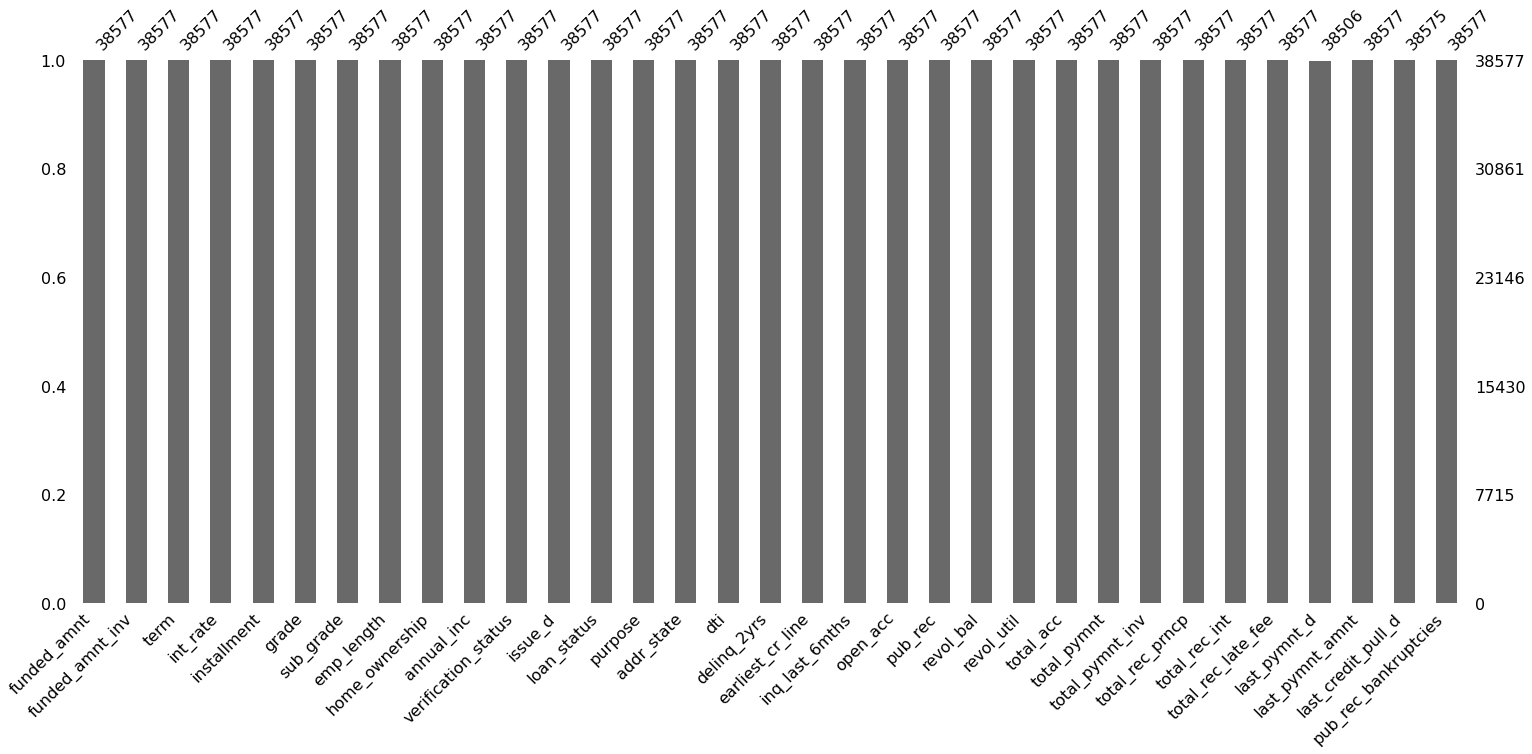

In [25]:
msno.bar(df)

In [26]:
# removing the variable which are not available at the time of issuing loan. 
behavioral_variables = ['earliest_cr_line','open_acc','revol_bal', 'total_acc','total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
customer_behavioral_col = behavioral_variables
df.drop(columns=customer_behavioral_col, inplace=True)

In [27]:
df.shape

(38577, 21)

In [28]:
df.columns

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
df.describe()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,pub_rec_bankruptcies
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,10784.059,10222.481,41.898,11.932,322.466,68777.974,13.273,0.147,0.872,0.055,48.703,0.043
std,7090.306,7022.721,10.333,3.691,208.639,64218.682,6.673,0.492,1.072,0.238,28.346,0.203
min,500.000,0.000,36.000,5.420,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5200.000,5000.000,36.000,8.940,165.740,40000.000,8.130,0.000,0.000,0.000,25.200,0.000
50%,9550.000,8733.440,36.000,11.710,277.860,58868.000,13.370,0.000,1.000,0.000,49.100,0.000
75%,15000.000,14000.000,36.000,14.380,425.550,82000.000,18.560,0.000,1.000,0.000,72.200,0.000
max,35000.000,35000.000,60.000,24.400,1305.190,6000000.000,29.990,11.000,8.000,4.000,99.900,2.000


<AxesSubplot:>

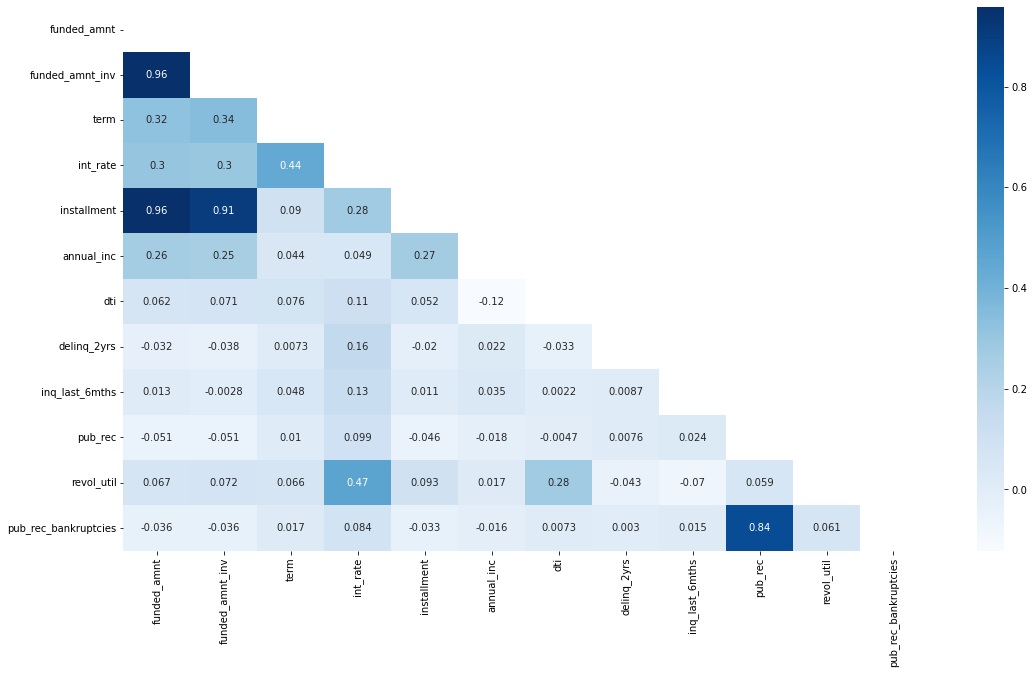

In [30]:
# Studying Correlation between features 

plt.figure(figsize=(18,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap='Blues')

## Univariate Analysis - Continous Variables

In [31]:
cont_cols = [ i for i in df.columns if i in cont_cols]

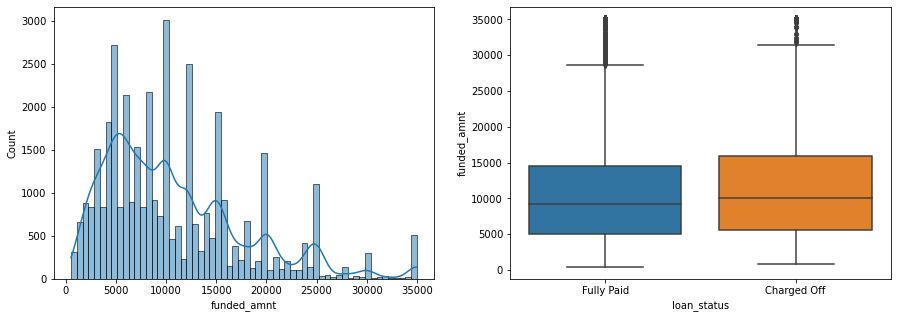

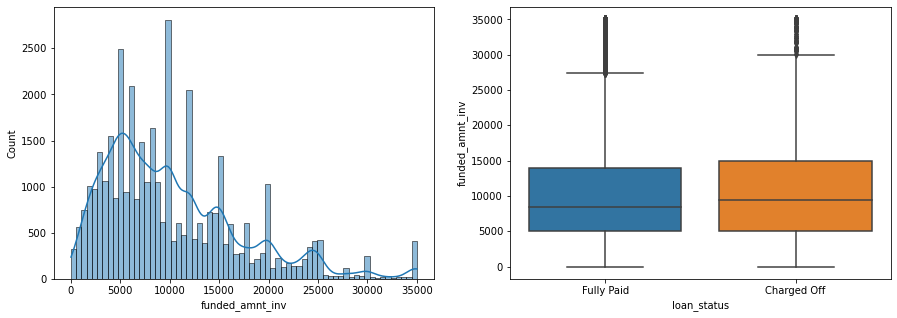

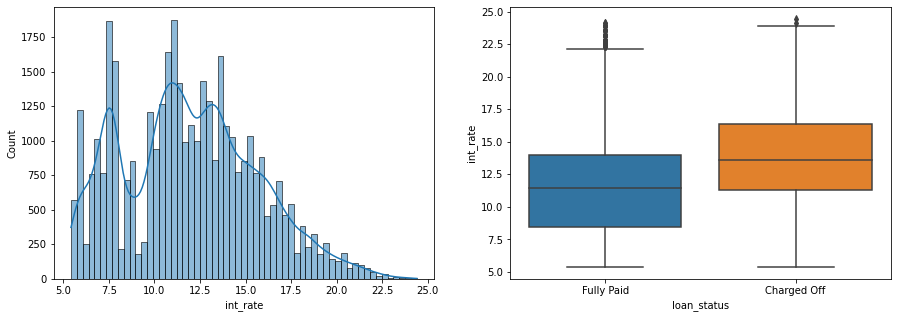

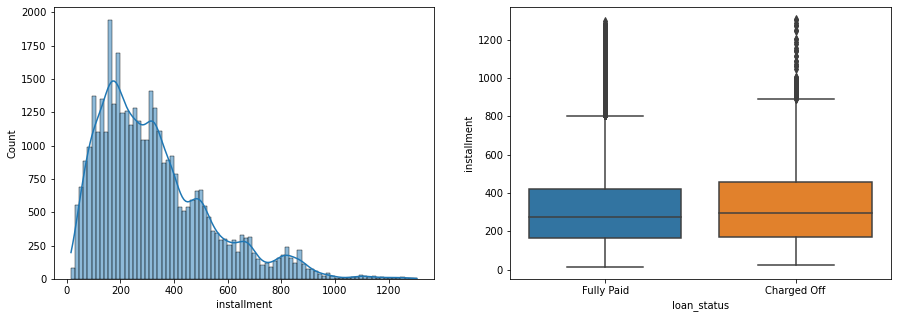

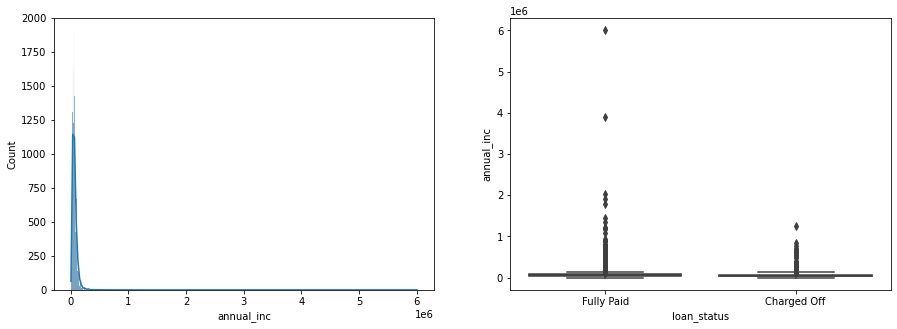

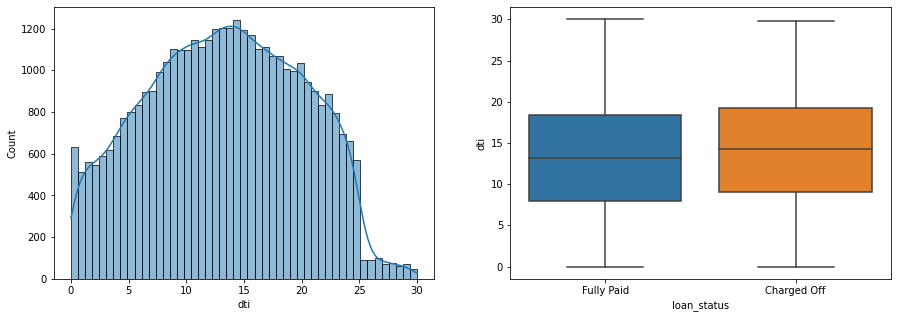

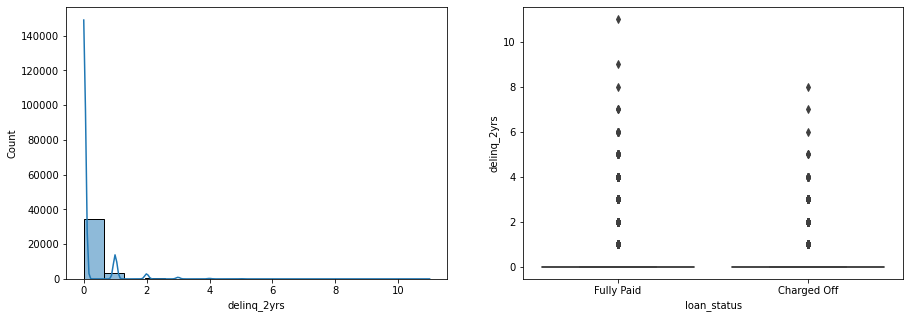

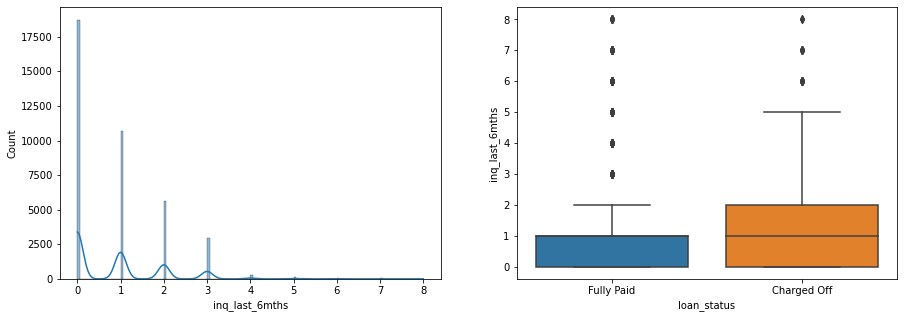

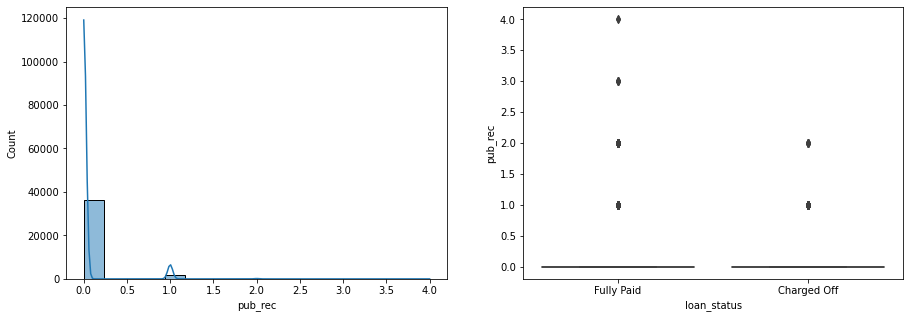

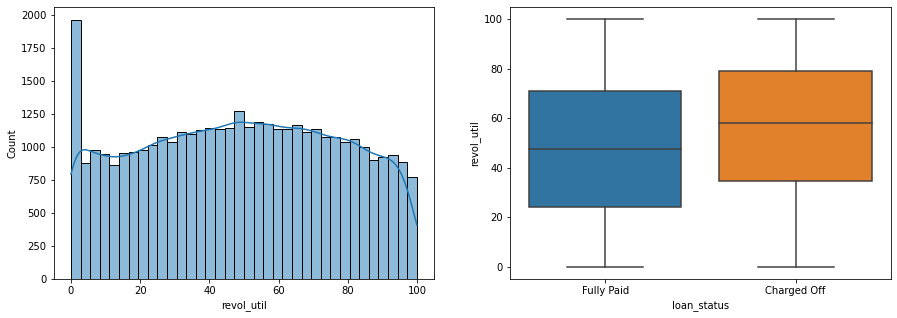

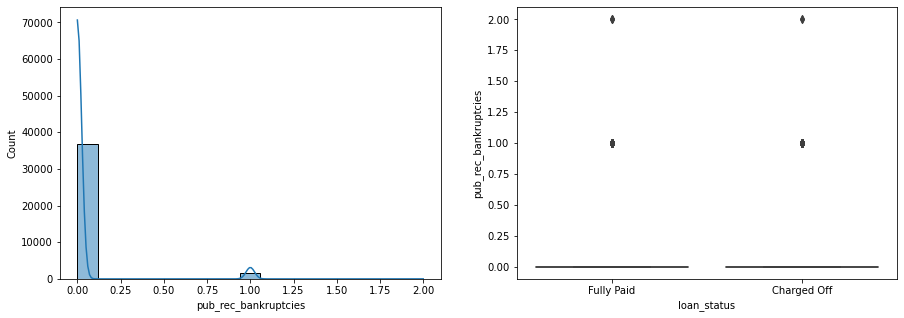

In [32]:
for i in cont_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[i], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x='loan_status',y=i,data=df)

# Insights:

- Int_rate: Charged off loans have on average higher interest rate than the fully paid loans
- Inq_last_6mths: The Charged off loans have more inquiries compared to fully paid loans
- revol_util: Revolving line utilization rate is higher for charges off loans
- A lot of features are quite skewed including annual income, delinq_2yrs,pub_records,etc

# Univariate Analysis - Categorical Variables

In [33]:
cat_cols =[i for i in df.columns if (df[i].dtype == 'object' )]

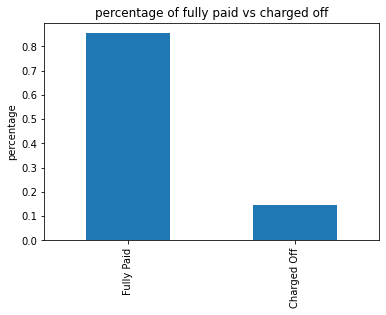

In [34]:
#Percentage of charged off
df.loan_status.value_counts(normalize=True).plot.bar()
plt.ylabel('percentage')
plt.title('percentage of fully paid vs charged off')
plt.show()

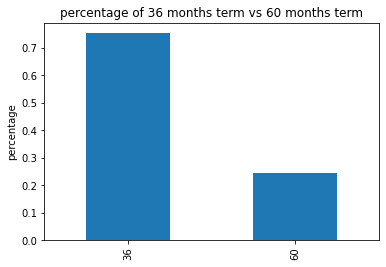

In [35]:
df.term.value_counts(normalize=True).plot.bar()
plt.ylabel('percentage')
plt.title('percentage of 36 months term vs 60 months term')
plt.show()

In [36]:
cat_cols = [ i for i in df.columns if i in cat_cols]

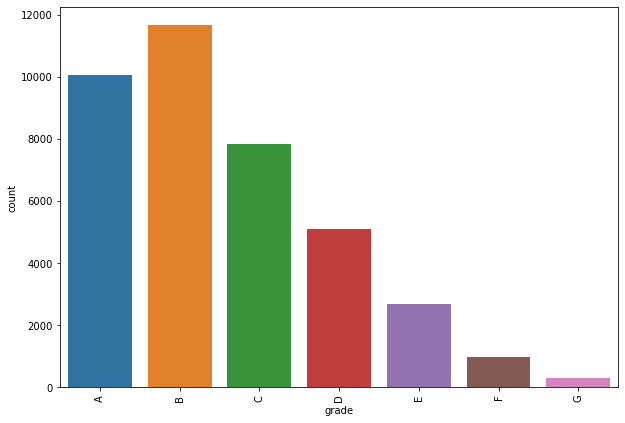

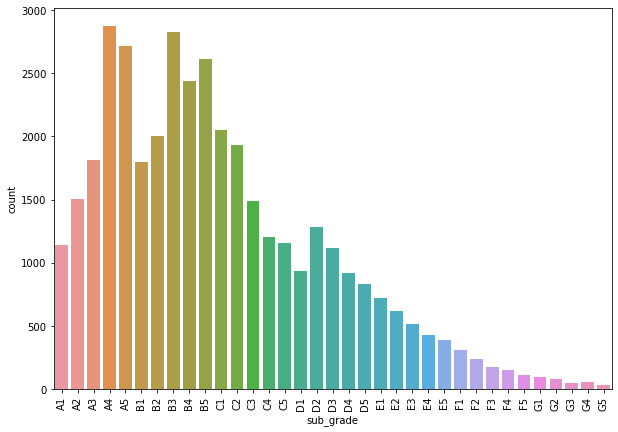

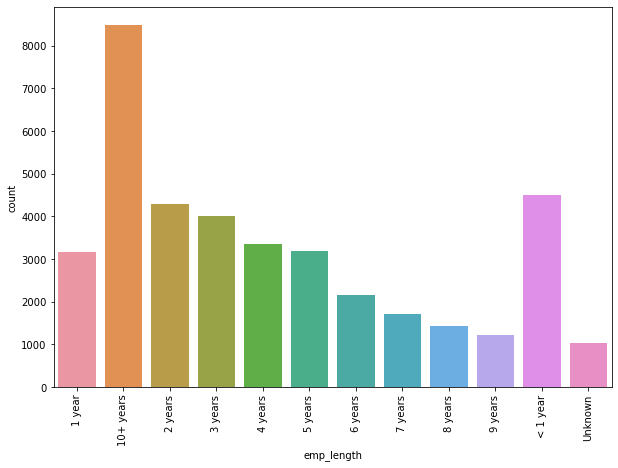

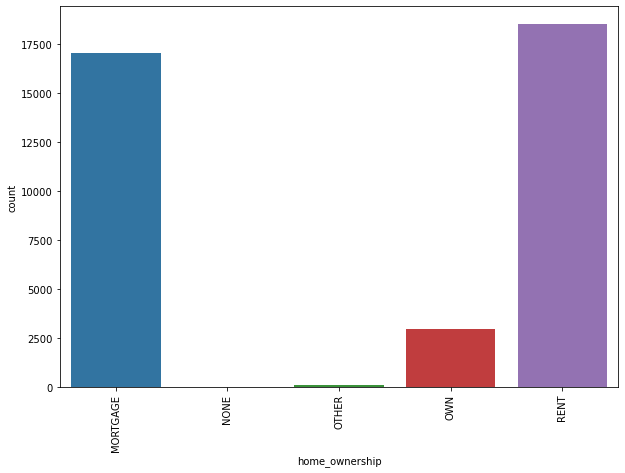

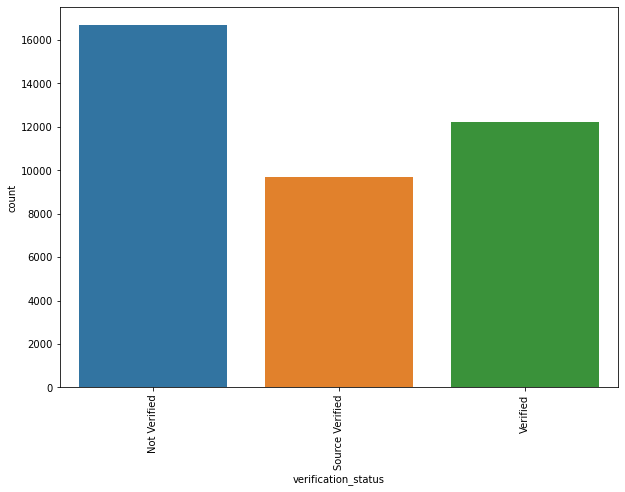

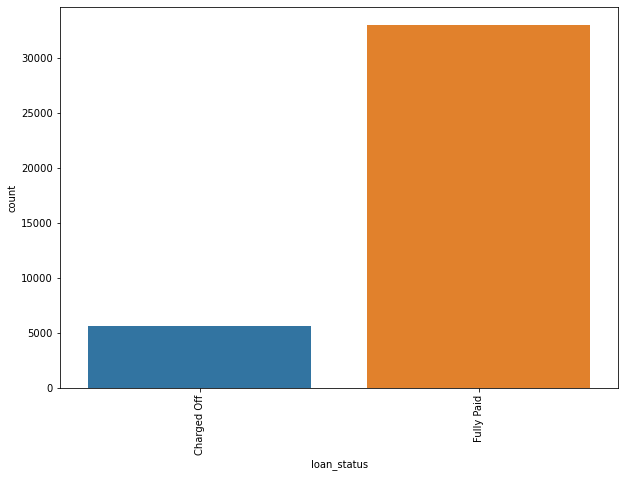

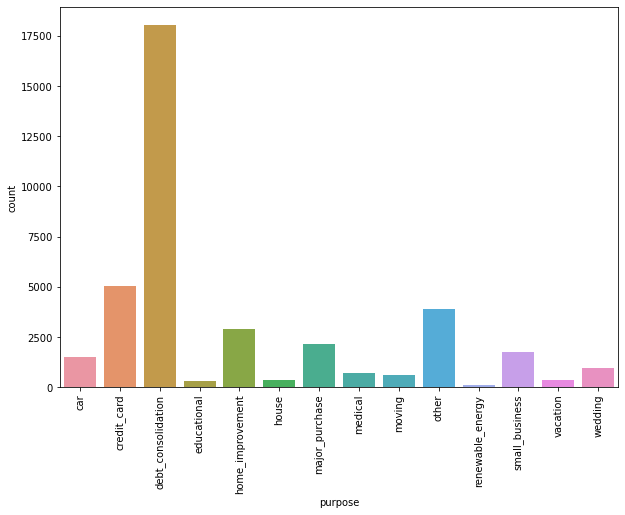

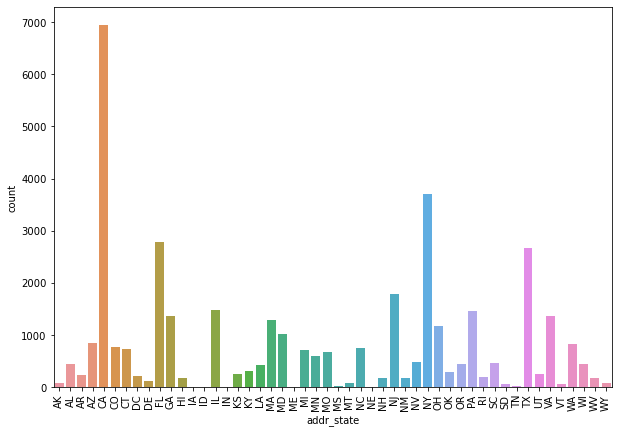

In [37]:
for i in cat_cols:
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(x=i, data=df.sort_values(by=i), orient='vert')

# Insights:- 
- There are around 15 percent charged off loans
- 76% of loans term is 36 months rest are 60 months.
- States CA, NY, FL, Tx has highest number of loans.

## Outlier Treatment

In [38]:
# Treating Outliers in annual income
# Imputing values higher than the 99th percentile to the 99th percentile value
income_99 =df['annual_inc'].quantile(0.99)
df['annual_inc_treated'] =df['annual_inc'].apply(lambda x: x if x<=income_99 else income_99 )

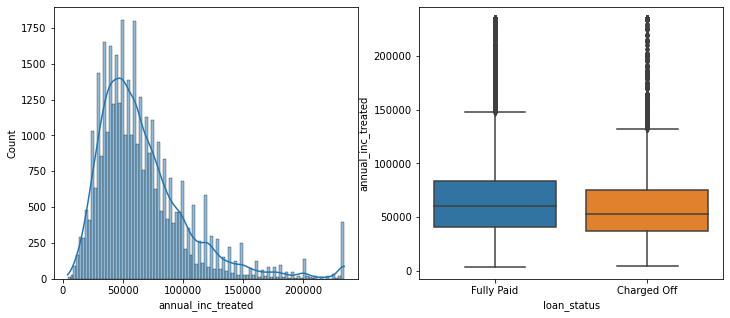

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['annual_inc_treated'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='annual_inc_treated',data=df)
plt.show()

In [40]:
# Treating Outliers in installment
# Imputing values higher than the 99th percentile to the 99th percentile value
installment_99 =df['installment'].quantile(0.99)
df['installment'] =df['installment'].apply(lambda x: x if x<=installment_99 else installment_99 )

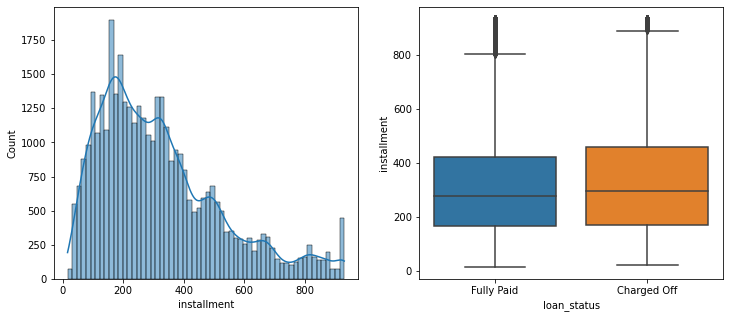

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['installment'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='installment',data=df)
plt.show()

# Bivariate and Segmented Analysis

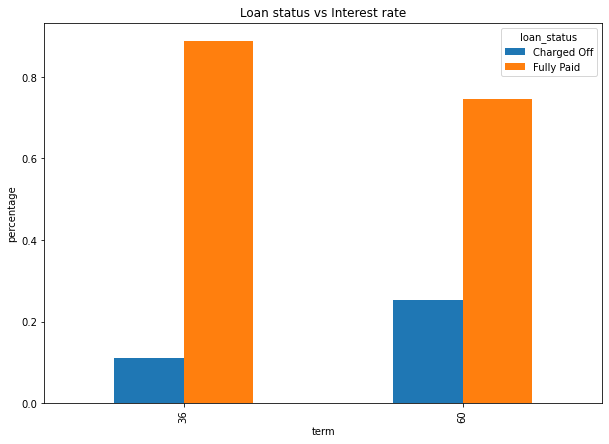

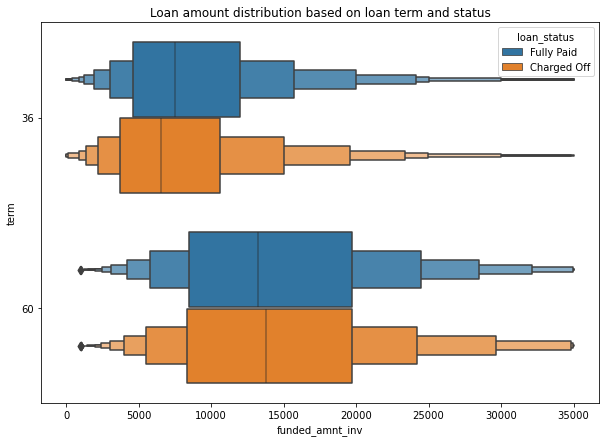

In [42]:
term = df.groupby(['term'])['loan_status'].value_counts(normalize=True).unstack()
term.plot.bar(figsize=(10,7))
plt.title("Loan status vs Interest rate")
plt.ylabel('percentage')
plt.show()
plt.figure(figsize=(10,7))
sns.boxenplot(x=df.funded_amnt_inv, y= df.term.astype(str), hue=df.loan_status)
plt.title("Loan amount distribution based on loan term and status")
plt.show()

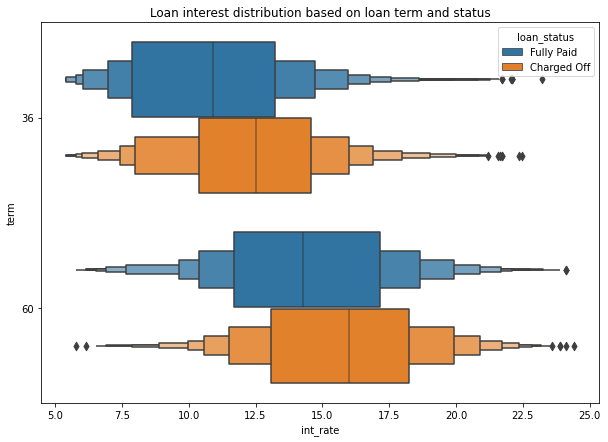

In [43]:
plt.figure(figsize=(10,7))
sns.boxenplot(x=df.int_rate, y= df.term.astype(str), hue=df.loan_status)
plt.title("Loan interest distribution based on loan term and status")
plt.show()


In [44]:
term

loan_status,Charged Off,Fully Paid
term,,
36,0.111,0.889
60,0.253,0.747


Text(0.5, 1.0, 'Loan status percentage vs interest rate and Term')

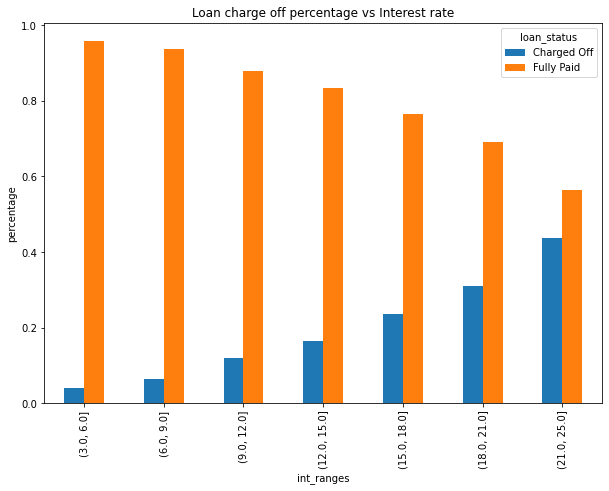

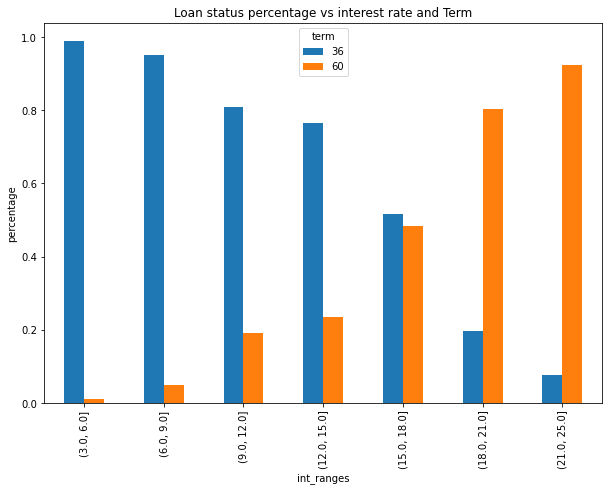

In [45]:
df['int_ranges'] = pd.cut(x=df['int_rate'], bins=[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 25.0])
df.groupby(['int_ranges'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.ylabel('percentage')
plt.title("Loan charge off percentage vs Interest rate")
df.groupby(['int_ranges'])['term'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.ylabel('percentage')
plt.title("Loan status percentage vs interest rate and Term")

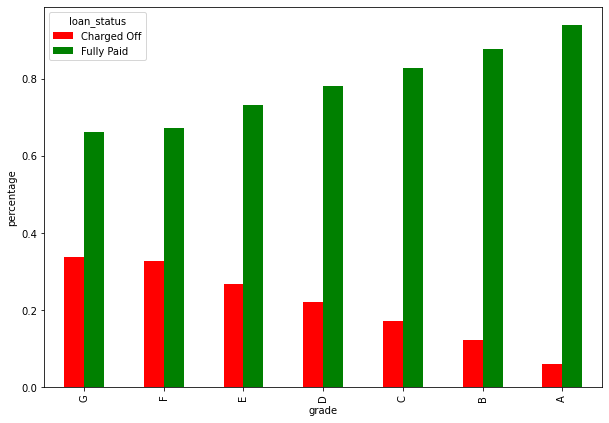

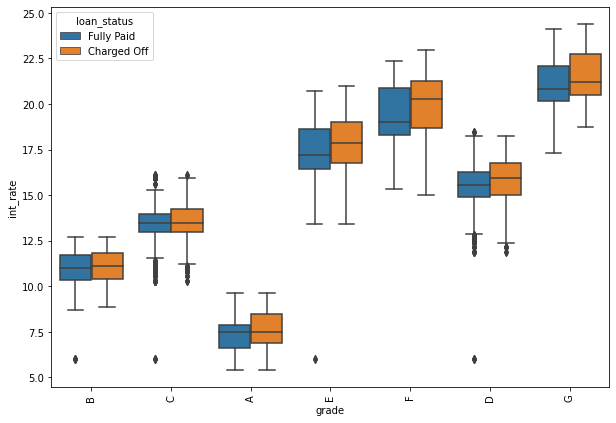

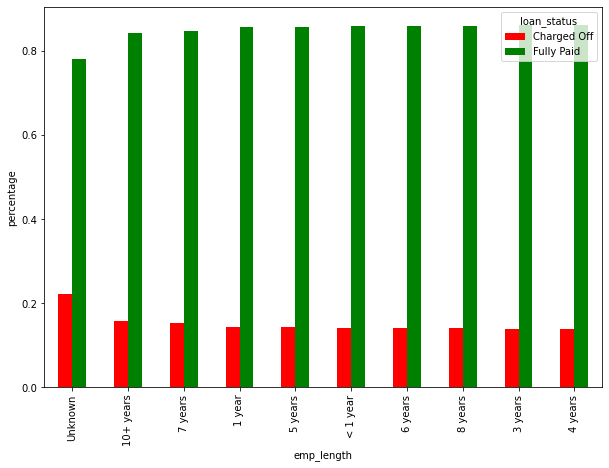

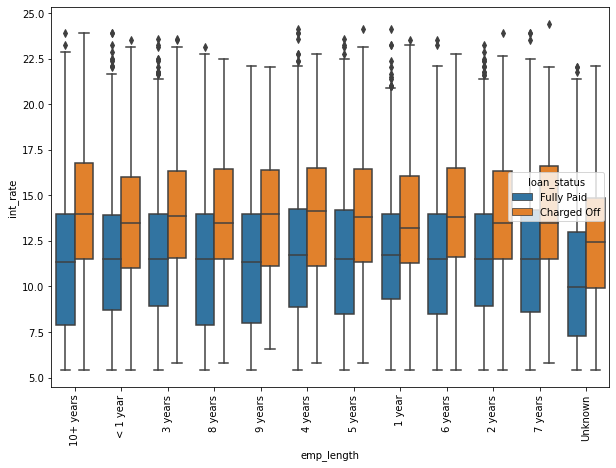

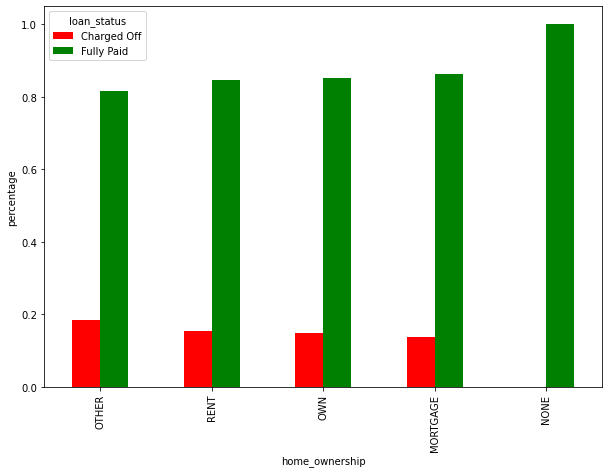

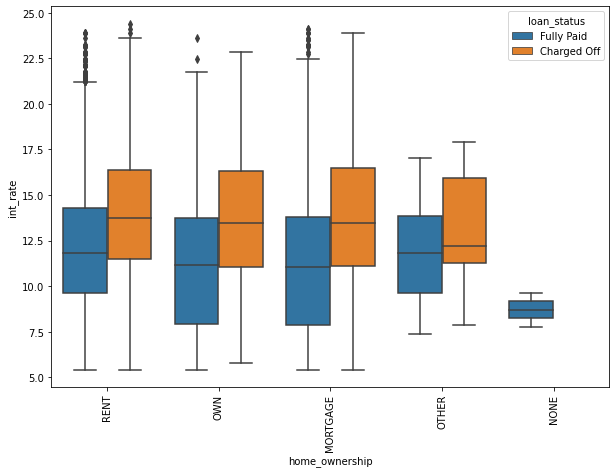

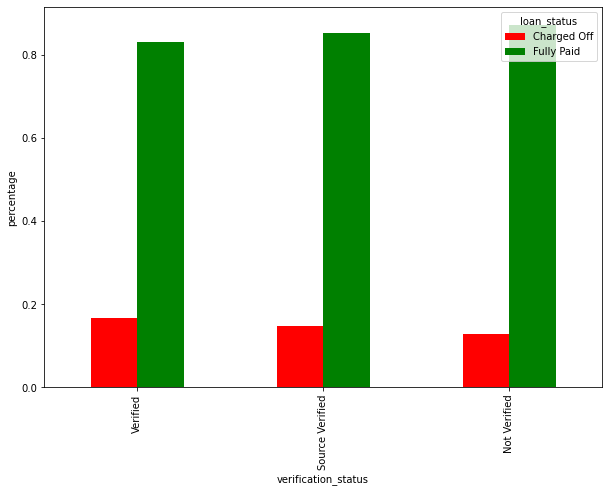

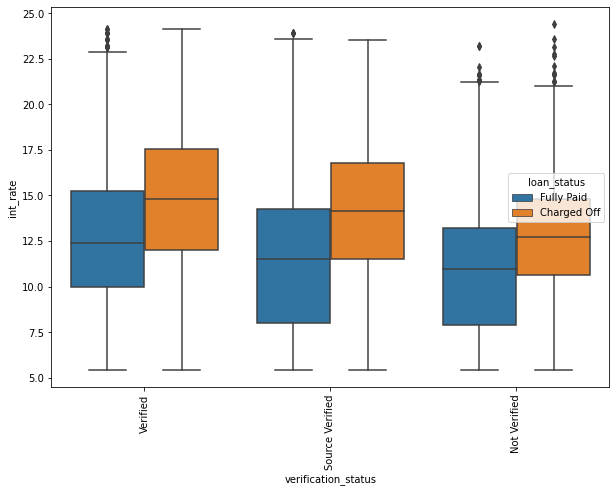

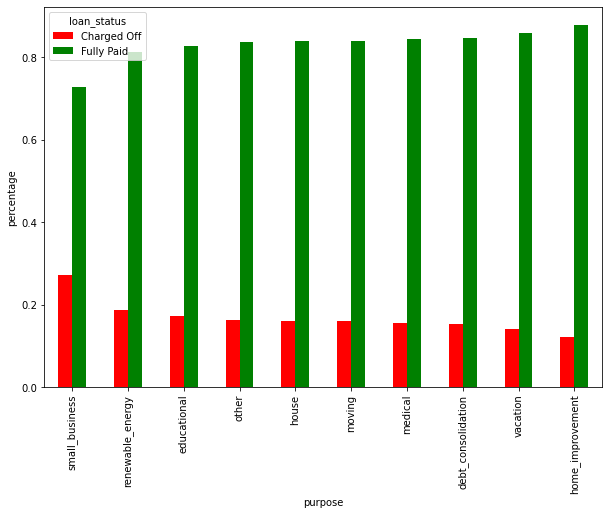

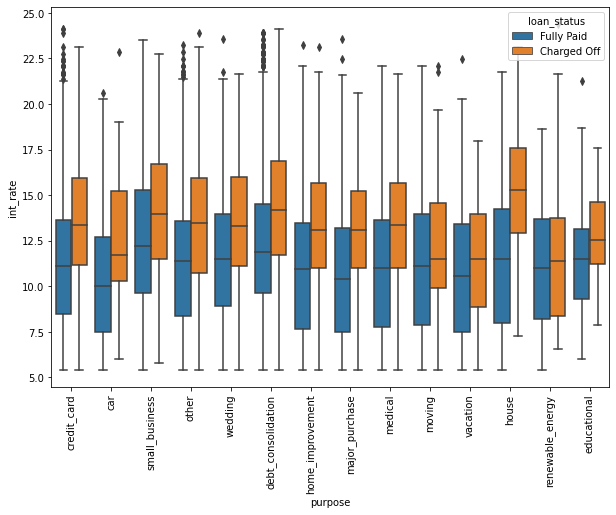

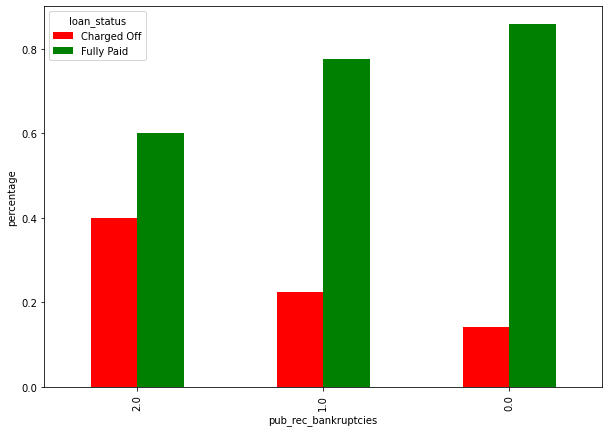

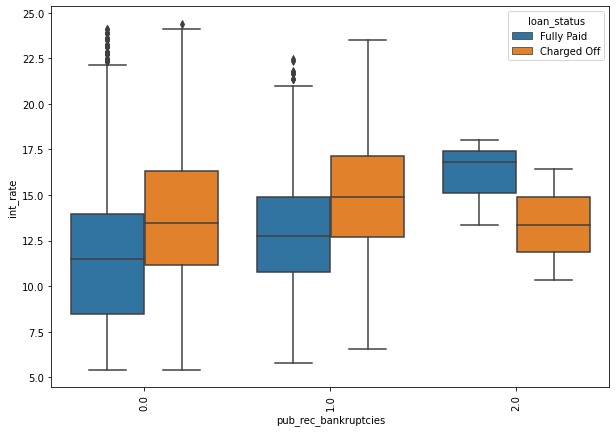

In [46]:
for i in ['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'pub_rec_bankruptcies']:
    data = df.groupby([i])['loan_status'].value_counts(normalize=True).unstack()
    data = data.sort_values(by='Charged Off', ascending=False).head(10)
    data.plot.bar(figsize=(10, 7), color={"Charged Off": "red", "Fully Paid":"green"})
    plt.ylabel('percentage')
    plt.figure(figsize=(10,7))
    sns.boxplot(x=df[i], y= df.int_rate, hue=df.loan_status)
    plt.xticks(rotation=90)
    plt.show()

In [47]:
df.groupby(['grade'])['int_ranges'].value_counts().unstack()

,"(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]","(12.0, 15.0]","(15.0, 18.0]","(18.0, 21.0]","(21.0, 25.0]"
grade,,,,,,,
A,1331,8290,424,0,0,0,0
B,5,172,10074,1424,0,0,0
C,4,0,346,6924,560,0,0
D,4,0,9,1518,3412,142,0
E,2,0,0,54,1714,893,0
F,0,0,0,0,67,712,197
G,0,0,0,0,1,154,144


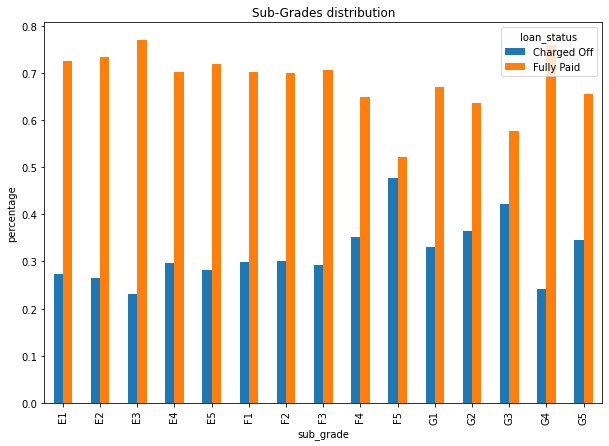

In [48]:
# sub-grade effect on the loan charge off
df[df.grade.isin(['G','F','E'])].groupby(['sub_grade'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.title("Sub-Grades distribution")
plt.ylabel('percentage')
plt.show()

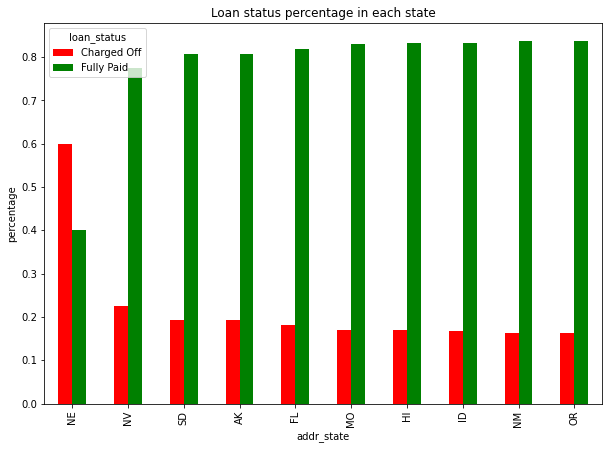

In [49]:
address_data = df.groupby(['addr_state'])['loan_status'].value_counts(normalize=True).unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(10, 7), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Loan status percentage in each state")
plt.ylabel('percentage')
plt.show()

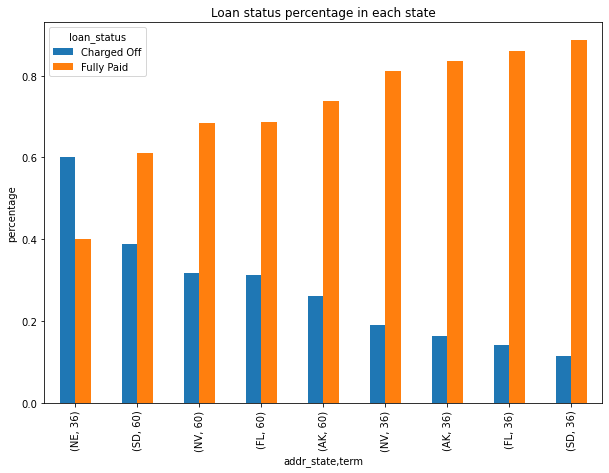

In [50]:
# analyzing the term of loans in countries having top 5 charge off.
address_data = df[df.addr_state.isin(['NE','NV','SD','AK','FL'])].groupby(['addr_state','term'])['loan_status'].value_counts(normalize=True).unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(10, 7))
plt.title("Loan status percentage in each state")
plt.ylabel('percentage')
plt.show()

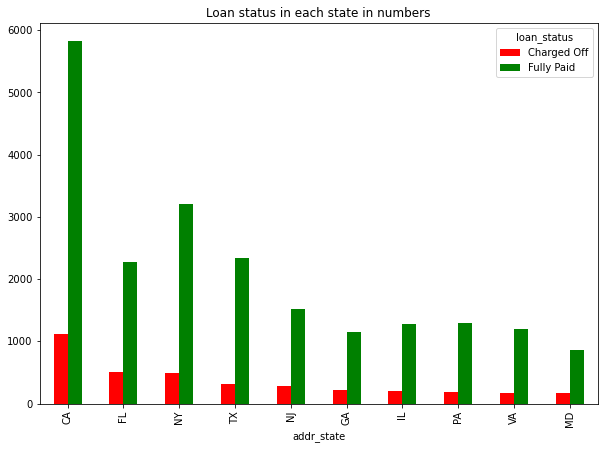

In [51]:
address_data = df.groupby(['addr_state'])['loan_status'].value_counts().unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(10, 7), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Loan status in each state in numbers")
plt.show()

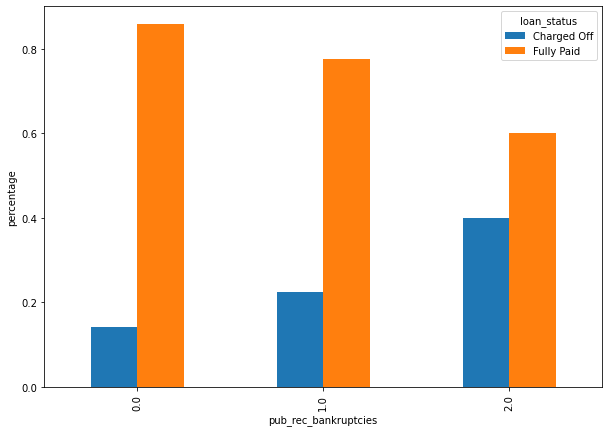

In [52]:
df.groupby(['pub_rec_bankruptcies']).loan_status.value_counts(normalize=True).unstack().plot.bar(figsize=(10, 7))
plt.ylabel('percentage')
plt.show()

Text(0, 0.5, 'percentage')

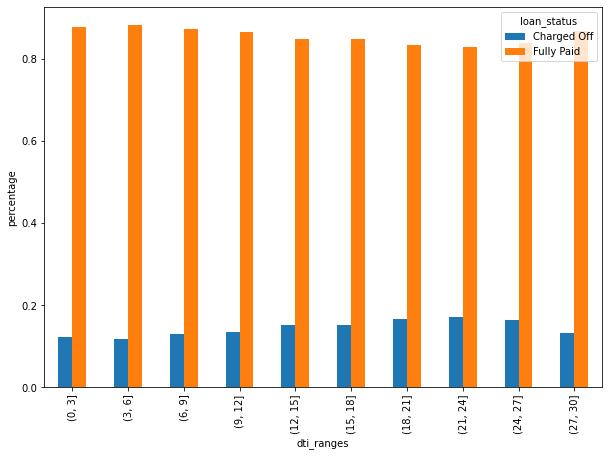

In [53]:
df['dti_ranges'] = pd.cut(x=df['dti'], bins=[0,3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
dti_ranges = df.groupby(['dti_ranges'])['loan_status'].value_counts(normalize=True).unstack()
dti_ranges.plot.bar(figsize=(10,7))
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

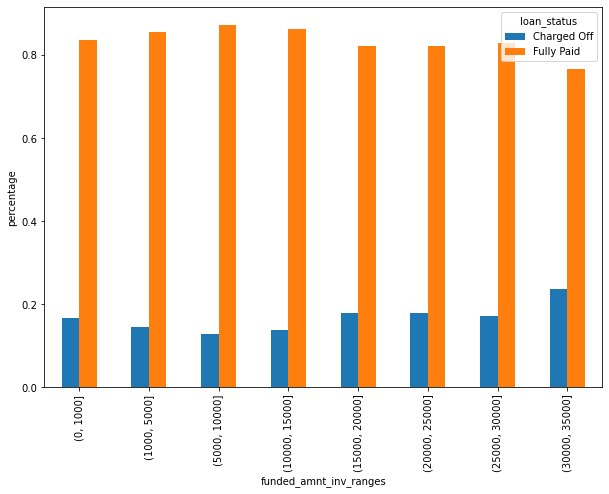

In [54]:
df['funded_amnt_inv_ranges'] = pd.cut(x=df['funded_amnt_inv'], bins=[0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
loan_ranges = df.groupby(['funded_amnt_inv_ranges'])['loan_status'].value_counts(normalize=True).unstack()
loan_ranges.plot.bar(figsize=(10, 7))
plt.ylabel('percentage')

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14868\2676018736.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['issue_d'])['loan_status', 'term'].value_counts().unstack()


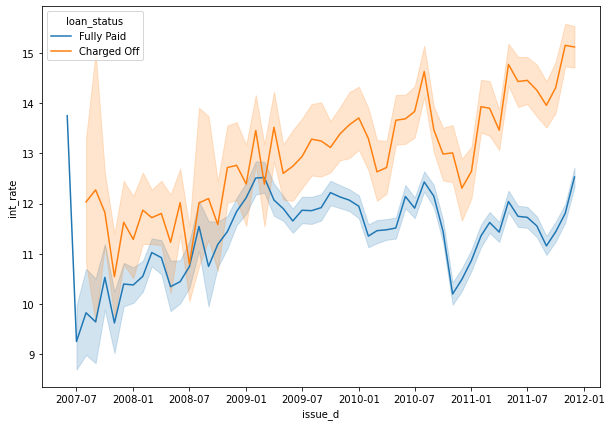

In [55]:
df.groupby(['issue_d'])['loan_status', 'term'].value_counts().unstack()
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.issue_d, y=df.int_rate, hue=df.loan_status)
plt.show()

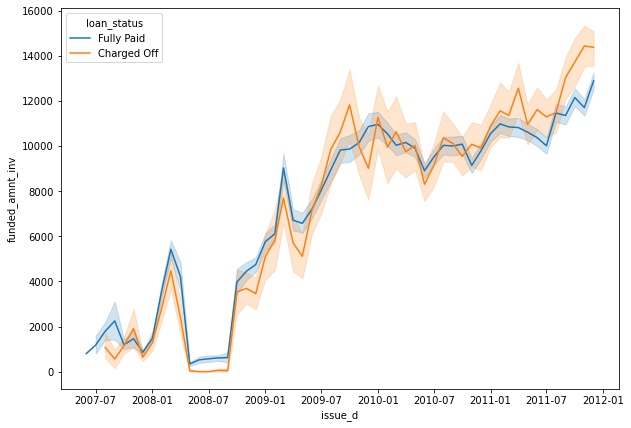

In [56]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.issue_d, y=df.funded_amnt_inv, hue=df.loan_status)
plt.show()

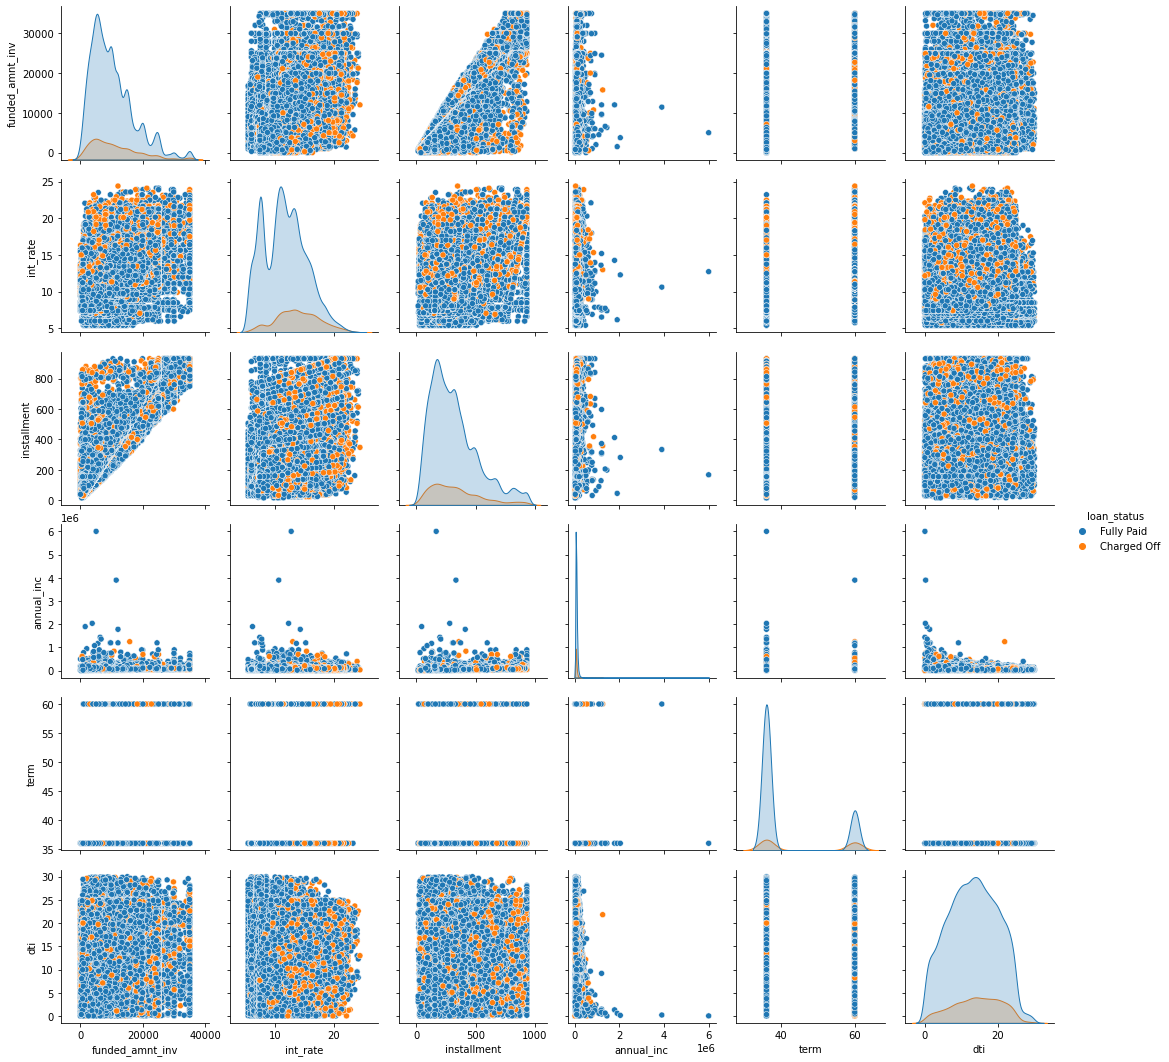

In [57]:
sns.pairplot(data=df[['funded_amnt_inv','int_rate','installment','annual_inc','loan_status', 'term', 'dti']], hue='loan_status')
plt.show()

# Insights:

- Interest rate - If the interest rate is high then there is a high chance of being charged off.
- Loan term - If the loan term is 60 months then there is more chance of being charged off.
- Grade: G, F, and E have high-interest rates and percentages of charged-off loans.
- If we look into subgrades F5 and G3 have more than 40 percent charged off loans.
- Employment Length: Employment length unknown has a high percentage of charged off.
- Loans taken for Small business has a high percentage of charge off's.
- NE State has the highest charged-off percentage(almost 60 percent).
- CA State has a large number of charged-off loans
- If pub_rec_bankruptcies is high then also there is more chance of being Charged off.
- Charge-off percentage is slightly high(~2-4) for DTI range is between 15 to 27.
- Charge-off is slightly high if the loan amount is greater than 30K.

__The lending club should consider the above factors while approving the loan.__

# Feature Engineering
- Deriving new features from the data as per the understanding

In [58]:
def issued(x):
    if x==0:
        return 'Approved_amount'
    if x<0:
        return 'More_than_Approved_amount'
    if x>0:
        return 'Less_than_Approved_amount'

# Calculating the difference amount of funded_amnt and funded_amnt_inv 
# to check if issuing more/less amount than approved money has any effect on charged off
df['issued_flag'] = df['funded_amnt']-df['funded_amnt_inv']

df['issued_flag'] = df['issued_flag'].map(issued)

In [59]:
# calculation installment monthly income percentage
df['monthly_income'] =round(df['annual_inc']/12)
df['installment_monthly_income_prcnt'] =round((df['installment']/df['monthly_income'])*100,2)

# Analyzing features created

In [60]:
df['issued_flag'].value_counts(normalize=True)*100

Approved_amount             50.152
Less_than_Approved_amount   49.848
Name: issued_flag, dtype: float64

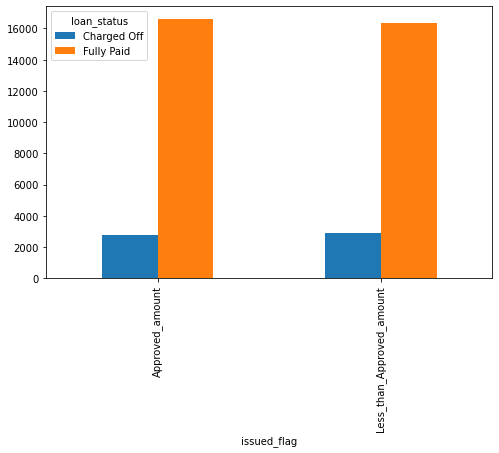

In [61]:
# Analyzing last payment flag
df.groupby(['issued_flag'])['loan_status'].value_counts().unstack().plot.bar(figsize=(8,5))
plt.show()

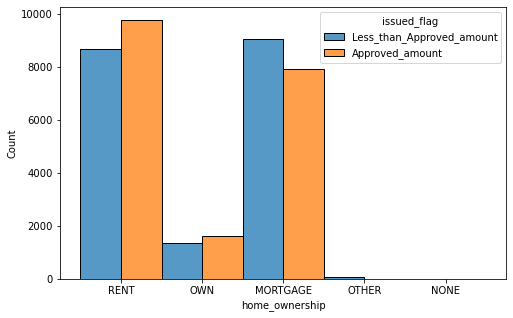

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(x='home_ownership',hue='issued_flag',data=df, multiple='dodge')
plt.show()

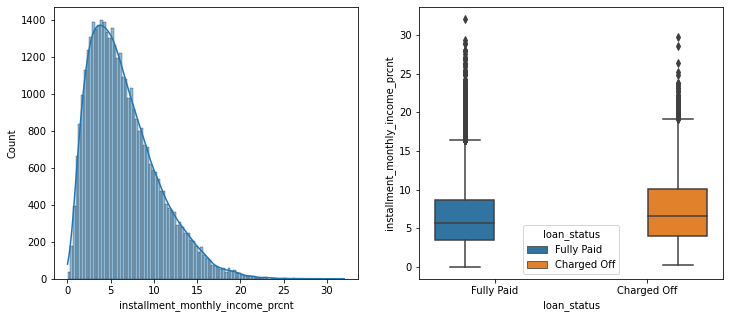

In [63]:
# Analyzing installment_monthly_income_percentage
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['installment_monthly_income_prcnt'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='installment_monthly_income_prcnt', hue='loan_status', data=df)
plt.show()

# Insights:
- Issuing more/less loan amount than approved amount doesn't have any effect on charged off. 
- If the Installment to Monthly income percentage is more than ~8%, the chances of chargeoff increases